### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url) 
response

<Response [200]>

#### 3. bs > DataFrame

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')

In [6]:
dom

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<title>G마켓 - G마켓 베스트</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=980" id="viewport" name="viewport"/>
<meta content="all" name="ROBOTS"/>
<meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/>
<meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/>
<meta content="(주)이베이코리아" name="author"/>
<meta

In [9]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li')
len(elements)
# id가 없는 걸 선택해야한다.

200

In [8]:
elements[0]

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [10]:
element = elements[0]

In [11]:
element

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [21]:
data = {
    'title' : element.select_one('.itemname').text,
    'link' : element.select_one('.itemname').get('href'),
    'img' : 'http:' + element.select_one('img').get('data-original'),
    'o-price' : element.select_one('.o-price').text,
    's-price' : element.select_one('.s-price').text.strip().split('\n')[0],
}
data

{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426476828321',
 'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
 'o-price': '정가33,800원',
 's-price': '할인가23,700원'}

In [14]:
element

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426476828321" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [22]:
data = []
for element in elements:
    data.append({
        'title' : element.select_one('.itemname').text,
        'link' : element.select_one('.itemname').get('href'),
        'img' : 'http:' + element.select_one('img').get('data-original'),
        'o-price' : element.select_one('.o-price').text,
        's-price' : element.select_one('.s-price').text.strip().split('\n')[0],
    })
data[:3]

[{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426476828321',
  'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
  'o-price': '정가33,800원',
  's-price': '할인가23,700원'},
 {'title': '[피셔프라이스]피셔프라이스 러닝 푸드트럭',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=1998535842&ver=638122426476828321',
  'img': 'http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714',
  'o-price': '정가210,000원',
  's-price': '할인가99,000원'},
 {'title': '[나이키키즈](대구신세계)[나이키키즈] (105~170) 조던 썸머 상/하의세트 세일가',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=2772877848&ver=638122426476828321',
  'img': 'http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714',
  'o-price': '정가58,000원',
  's-price': '할인가45,820원'}]

In [23]:
data = []
for element in elements:
    data.append({
        'title' : element.select_one('.itemname').text,
        'link' : element.select_one('.itemname').get('href'),
        'img' : 'http:' + element.select_one('img').get('data-original'),
        'o-price' : element.select_one('.o-price').text,
        's-price' : element.select_one('.s-price').text.strip().split('\n')[0],
    })
df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o-price,s-price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"정가43,000원","할인가12,900원"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"정가96,000원","할인가80,000원"


In [29]:
df[20:40]

,title,link,img,o-price,s-price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,,"할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,,"할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,,"할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"
25,[닥터지]닥터지 블랙 스네일 달팽이크림 50ml 1+1_A005956,http://item.gmarket.co.kr/Item?goodscode=27324...,http://gdimg.gmarket.co.kr/2732477762/still/30...,"정가26,300원","할인가24,200원"
26,[오뚜기]오뚜기 가벼운참치 라이트스탠다드 135GX12개,http://item.gmarket.co.kr/Item?goodscode=25534...,http://gdimg.gmarket.co.kr/2553487898/still/30...,"정가29,900원","할인가27,900원"
27,아침이슬사과 22년 햇 부사 가정용 중대과 4.5kg(22과내),http://item.gmarket.co.kr/Item?goodscode=26129...,http://gdimg.gmarket.co.kr/2612939665/still/30...,"정가15,470원","할인가10,900원"
28,쌈빡김치 국내산 100% 전라도 파김치 1kg,http://item.gmarket.co.kr/Item?goodscode=27851...,http://gdimg.gmarket.co.kr/2785125457/still/30...,"정가15,000원","할인가10,000원"
29,[풀무원]로스팅짜장 라면 4봉(파기름2봉+고추기름2봉),http://item.gmarket.co.kr/Item?goodscode=23756...,http://gdimg.gmarket.co.kr/2375673537/still/30...,"정가10,000원","할인가9,400원"


In [31]:
# update : 데이터선택 = 수정할 데이터
df[df['o-price'] == '']

,title,link,img,o-price,s-price
12,[쉬크]쉬크 하이드로5 베이스 날14입+면도기,http://item.gmarket.co.kr/Item?goodscode=22463...,http://gdimg.gmarket.co.kr/2246382810/still/30...,,"할인가23,700원"
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,,"할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,,"할인가7,900원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,,"할인가11,800원"
31,[물고기삼촌]양꼬치 양깍두기 양고기 1kg + 쯔란1봉,http://item.gmarket.co.kr/Item?goodscode=19279...,http://gdimg.gmarket.co.kr/1927983843/still/30...,,"할인가25,900원"
32,[올리빙]도트 스탠드 분리수거함 3단 다용도 수납함 105L,http://item.gmarket.co.kr/Item?goodscode=23972...,http://gdimg.gmarket.co.kr/2397297134/still/30...,,"할인가29,900원"
34,[G클럽]니트릴장갑 100매+100매(200매)_화이트 블루 그레이 베이직블랙 요리...,http://item.gmarket.co.kr/Item?goodscode=27334...,http://gdimg.gmarket.co.kr/2733484740/still/30...,,"할인가10,500원"
37,정육생활 최현석의 부채살 구이용 200g x 4팩 (중복쿠폰가21200)+우삼겹20...,http://item.gmarket.co.kr/Item?goodscode=26198...,http://gdimg.gmarket.co.kr/2619820926/still/30...,,"할인가26,500원"
57,[테이팩스]박스테이프 벌크 황색 OPP 경포장 48mm x 40M 20개,http://item.gmarket.co.kr/Item?goodscode=26516...,http://gdimg.gmarket.co.kr/2651678711/still/30...,,"할인가11,500원"
63,[인플루엔셜](카드사 15% 할인+사은품 증정) 파친코 세트,http://item.gmarket.co.kr/Item?goodscode=27810...,http://gdimg.gmarket.co.kr/2781054134/still/30...,,"할인가28,440원"


In [33]:
# update : 데이터선택 = 수정할 데이터

idx = df[df['o-price'] == ''].index
df['o-price'].loc[idx] = df['s-price'].loc[idx]
df[20:40].head(2)

,title,link,img,o-price,s-price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,"할인가199,000원","할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"


In [39]:
# regex : 정규표현식
# 문자열 데이터를 특정 패턴으로 처리할때 사용하는 문법

In [40]:
# 정규표현식
# 가독성이 떨어짐
import re
price = '할인가1,111,800원'
re.findall('[0-9,]+',price)[0]

'1,111,800'

In [38]:
df['o-price'] = df['o-price'].apply(lambda price: re.findall('[0-9,]+', price)[0]) 
df['s-price'] = df['s-price'].apply(lambda price: re.findall('[0-9,]+', price)[0]) 
df.tail(2)

,title,link,img,o-price,s-price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"96,000","80,000"


In [42]:
txt = '저의 이메일 주소는 pdj1224@gmail.com과 pdj1224@naver.com 입니다.'
re.findall('[a-zA-Z0-9.]+@[a-z]+\.[a-z]+',txt)

['pdj1224@gmail.com', 'pdj1224@naver.com']

#### 4. download image

In [44]:
# 이미지 파일 저장할 디텍토리

In [45]:
import os
os.makedirs('data')

In [46]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\Documents\GitHub\KT_python_jupyter_notebook\2023.02.17\day2 디렉터리

2023-02-17  오후 03:47    <DIR>          .
2023-02-17  오후 03:47    <DIR>          ..
2023-02-17  오후 02:36    <DIR>          .ipynb_checkpoints
2023-02-17  오후 01:41            19,736 01_html.ipynb
2023-02-17  오후 02:10            12,470 02_css_selector.ipynb
2023-02-17  오후 02:36            11,656 03_naver_relational_keywords.ipynb
2023-02-17  오후 03:46           465,131 04_gmarket.ipynb
2023-02-17  오후 02:38             2,497 05_selenium.ipynb
2023-02-17  오후 03:47    <DIR>          data
2023-02-17  오전 11:49           679,441 zzzzzz.png
               6개 파일           1,190,931 바이트
               4개 디렉터리  105,787,711,488 바이트 남음


In [47]:
import os
dir_name = 'data'
if not os.path.exists(dir_name)
os.makedirs('data')

SyntaxError: invalid syntax (3684085950.py, line 3)

In [50]:
df.tail(1)

,title,link,img,o-price,s-price
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"96,000","80,000"


In [49]:
img_link = df.loc[0,'img']
print(img_link)

http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714


In [51]:
response = requests.get(img_link)
response

<Response [200]>

In [53]:
with open('data/test.png','wb') as file:
    file.write(response.content)

In [54]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\Documents\GitHub\KT_python_jupyter_notebook\2023.02.17\day2\data 디렉터리

2023-02-17  오후 03:52    <DIR>          .
2023-02-17  오후 03:52    <DIR>          ..
2023-02-17  오후 03:52            33,866 test.png
               1개 파일              33,866 바이트
               2개 디렉터리  105,787,772,928 바이트 남음


In [55]:
# pillow : 파이썬에서 이미지 전처리를 하는 패키지
from PIL import Image as pil

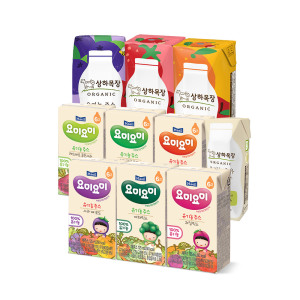

In [56]:
pil.open('data/test.png')

In [ ]:
# for idx, data in df[:20].iterrows(): filename = '0' * (3 - len(str(idx))) + str(idx) filename = f'data/{filename}.png' print(idx, data['img'], filename) response = requests.get(data['img']) with open(filename, 'wb') as file: file.write(response.content)

In [71]:
for idx, data in df[:20].iterrows(): 
    filename = '0' * (3 - len(str(idx))) + str(idx)
    filename = f'data/{filename}.png' 
    print(idx, data['img'], filename)
    response = requests.get(data['img'])
    with open(filename,'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714 data/000.png
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714 data/001.png
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714 data/002.png
3 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021714 data/003.png
4 http://gdimg.gmarket.co.kr/2780877061/still/300?ver=2023021714 data/004.png
5 http://gdimg.gmarket.co.kr/2762345389/still/300?ver=2023021714 data/005.png
6 http://gdimg.gmarket.co.kr/182821824/still/300?ver=2023021714 data/006.png
7 http://gdimg.gmarket.co.kr/1977052165/still/300?ver=2023021714 data/007.png
8 http://gdimg.gmarket.co.kr/2635078880/still/300?ver=2023021714 data/008.png
9 http://gdimg.gmarket.co.kr/2347262038/still/300?ver=2023021714 data/009.png
10 http://gdimg.gmarket.co.kr/2090522905/still/300?ver=2023021714 data/010.png
11 http://gdimg.gmarket.co.kr/2779014323/still/300?ver=2023021714 data/011.png
12 http://gdimg.gmarket.co.kr/2246382810/still/300?ver=20230217

In [72]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\Documents\GitHub\KT_python_jupyter_notebook\2023.02.17\day2\data 디렉터리

2023-02-17  오후 04:03    <DIR>          .
2023-02-17  오후 04:03    <DIR>          ..
2023-02-17  오후 04:02            33,866 0.png
2023-02-17  오후 04:03            33,866 000.png
2023-02-17  오후 04:03            20,310 001.png
2023-02-17  오후 04:03            10,109 002.png
2023-02-17  오후 04:03            29,089 003.png
2023-02-17  오후 04:03             5,481 004.png
2023-02-17  오후 04:03             6,896 005.png
2023-02-17  오후 04:03            26,815 006.png
2023-02-17  오후 04:03            23,003 007.png
2023-02-17  오후 04:03            15,319 008.png
2023-02-17  오후 04:03             7,638 009.png
2023-02-17  오후 04:03            24,620 010.png
2023-02-17  오후 04:03             5,751 011.png
2023-02-17  오후 04:03            21,315 012.png
2023-02-17  오후 04:03             6,248 013.png
2023-02-17  오후 04:03            46,155 014.png
2023-02-17  오후 04:03            63,

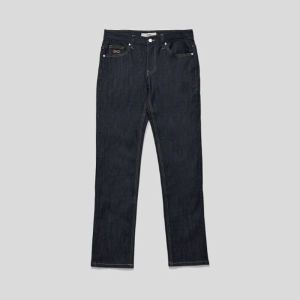

In [61]:
pil.open('data/4.png')

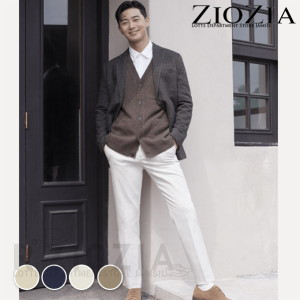

In [62]:
pil.open('data/3.png')